In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

#For inline plotting 
%matplotlib inline                 
%config InlineBackend.figure_format = 'svg'

plt.style.use("seaborn-v0_8-dark") 

In [3]:
# get the data 
# original source, https://www.kaggle.com/camnugent/sandp500 

!wget -nc https://lazyprogrammer.me/course_files/all_stocks_5yr.csv 


--2024-07-01 16:48:55--  https://lazyprogrammer.me/course_files/all_stocks_5yr.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29580549 (28M) [text/csv]
Saving to: 'all_stocks_5yr.csv'

all_stocks_5yr.csv  100%[===================>]  28.21M  16.1MB/s    in 1.8s    

2024-07-01 16:48:58 (16.1 MB/s) - 'all_stocks_5yr.csv' saved [29580549/29580549]



-----
## 1. Understanding the Fundamentals of Financial Data
------

In [3]:
df = pd.read_csv('all_stocks_5yr.csv')

df.head()

date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


Observations: 

- Index type is object, 
- There are some missing values. 

In [5]:
# Focus on NVIDIA

nvda = df[df['Name'] == 'NVDA'].copy()

nvda['date'] = pd.to_datetime(nvda.loc[:,'date'])

nvda.set_index('date', inplace=True)

nvda.head()

open     high    low  close    volume  Name
date                                                     
2013-02-08  12.370  12.4699  12.29  12.37   7677336  NVDA
2013-02-11  12.470  12.6350  12.35  12.51  10207599  NVDA
2013-02-12  12.395  12.5650  12.38  12.43   6945065  NVDA
2013-02-13  12.440  12.6650  12.33  12.37  21322573  NVDA
2013-02-14  12.200  12.7400  12.05  12.73  22049335  NVDA

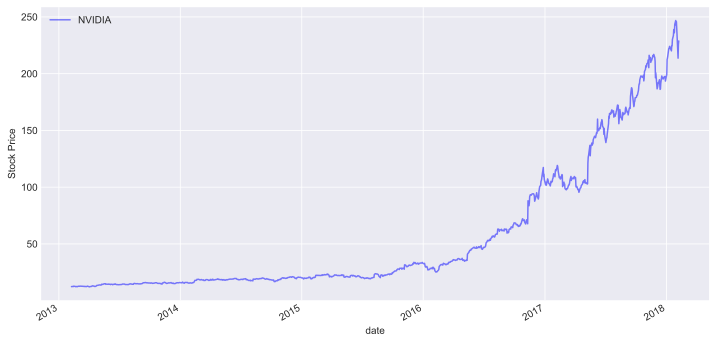

In [6]:
fig, axes = plt.subplots(figsize = (12,6))

nvda['close'].plot(ax = axes, c ='blue', alpha = 0.5, label = 'NVIDIA')

axes.set_ylabel('Stock Price')
axes.legend()

axes.grid()

NVIDIA made quite a jump between 2013 and 2018!

In [7]:
# Full range of dates between the initial timestamp and final one 
in_ts = df['date'].min()
fin_ts = df['date'].max()

time_stamps = pd.date_range(start=in_ts, end = fin_ts)  

time_stamps

DatetimeIndex(['2013-02-08', '2013-02-09', '2013-02-10', '2013-02-11',
               '2013-02-12', '2013-02-13', '2013-02-14', '2013-02-15',
               '2013-02-16', '2013-02-17',
               ...
               '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
               '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05',
               '2018-02-06', '2018-02-07'],
              dtype='datetime64[ns]', length=1826, freq='D')

In [8]:
# new df for storing only close prices 
close_df = pd.DataFrame(index = time_stamps)

In [9]:
close_df

Empty DataFrame
Columns: []
Index: [2013-02-08 00:00:00, 2013-02-09 00:00:00, 2013-02-10 00:00:00, 2013-02-11 00:00:00, 2013-02-12 00:00:00, 2013-02-13 00:00:00, 2013-02-14 00:00:00, 2013-02-15 00:00:00, 2013-02-16 00:00:00, 2013-02-17 00:00:00, 2013-02-18 00:00:00, 2013-02-19 00:00:00, 2013-02-20 00:00:00, 2013-02-21 00:00:00, 2013-02-22 00:00:00, 2013-02-23 00:00:00, 2013-02-24 00:00:00, 2013-02-25 00:00:00, 2013-02-26 00:00:00, 2013-02-27 00:00:00, 2013-02-28 00:00:00, 2013-03-01 00:00:00, 2013-03-02 00:00:00, 2013-03-03 00:00:00, 2013-03-04 00:00:00, 2013-03-05 00:00:00, 2013-03-06 00:00:00, 2013-03-07 00:00:00, 2013-03-08 00:00:00, 2013-03-09 00:00:00, 2013-03-10 00:00:00, 2013-03-11 00:00:00, 2013-03-12 00:00:00, 2013-03-13 00:00:00, 2013-03-14 00:00:00, 2013-03-15 00:00:00, 2013-03-16 00:00:00, 2013-03-17 00:00:00, 2013-03-18 00:00:00, 2013-03-19 00:00:00, 2013-03-20 00:00:00, 2013-03-21 00:00:00, 2013-03-22 00:00:00, 2013-03-23 00:00:00, 2013-03-24 00:00:00, 2013-03-25 00:00:00, 2013-03-26 00:00:00, 2013-03-27 00:00:00, 2013-03-28 00:00:00, 2013-03-29 00:00:00, 2013-03-30 00:00:00, 2013-03-31 00:00:00, 2013-04-01 00:00:00, 2013-04-02 00:00:00, 2013-04-03 00:00:00, 2013-04-04 00:00:00, 2013-04-05 00:00:00, 2013-04-06 00:00:00, 2013-04-07 00:00:00, 2013-04-08 00:00:00, 2013-04-09 00:00:00, 2013-04-10 00:00:00, 2013-04-11 00:00:00, 2013-04-12 00:00:00, 2013-04-13 00:00:00, 2013-04-14 00:00:00, 2013-04-15 00:00:00, 2013-04-16 00:00:00, 2013-04-17 00:00:00, 2013-04-18 00:00:00, 2013-04-19 00:00:00, 2013-04-20 00:00:00, 2013-04-21 00:00:00, 2013-04-22 00:00:00, 2013-04-23 00:00:00, 2013-04-24 00:00:00, 2013-04-25 00:00:00, 2013-04-26 00:00:00, 2013-04-27 00:00:00, 2013-04-28 00:00:00, 2013-04-29 00:00:00, 2013-04-30 00:00:00, 2013-05-01 00:00:00, 2013-05-02 00:00:00, 2013-05-03 00:00:00, 2013-05-04 00:00:00, 2013-05-05 00:00:00, 2013-05-06 00:00:00, 2013-05-07 00:00:00, 2013-05-08 00:00:00, 2013-05-09 00:00:00, 2013-05-10 00:00:00, 2013-05-11 00:00:00, 2013-05-12 00:00:00, 2013-05-13 00:00:00, 2013-05-14 00:00:00, 2013-05-15 00:00:00, 2013-05-16 00:00:00, 2013-05-17 00:00:00, 2013-05-18 00:00:00, ...]

[1826 rows x 0 columns]

We have already seen that some stocks do not have data for all the timestamps within the full possible timerange. If we want to combine close prices of different tickers in a single dataframe we should take that into account. 

In [11]:
tickers= df['Name'].unique()

for ticker in tickers:
    
    # get the dataframe for the specfic ticker 
    df_ticker = df[df['Name'] == ticker]
    
    # store it to a temporary df with the desired structure,
    
    df_tmp = pd.DataFrame(data = df_ticker['close'].to_numpy(), index = pd.to_datetime(df_ticker.loc[:,'date']), columns = [ticker])
    
    # then left join with the df that has the full time stamps 
    
    close_df = close_df.join(df_tmp)
    
    # the final close_df will have close prices for all the tickers with NaN for dates when the data is not available 
    

In [12]:
close_df.head()

AAL     AAPL    AAP   ABBV    ABC    ABT    ACN   ADBE    ADI  \
2013-02-08  14.75  67.8542  78.90  36.25  46.89  34.41  73.31  39.12  45.70   
2013-02-09    NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2013-02-10    NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2013-02-11  14.46  68.5614  78.39  35.85  46.76  34.26  73.07  38.64  46.08   
2013-02-12  14.27  66.8428  78.60  35.42  46.96  34.30  73.37  38.89  46.27   

              ADM  ...   XLNX     XL    XOM   XRAY    XRX    XYL    YUM  \
2013-02-08  30.22  ...  37.51  28.24  88.61  42.87  31.84  27.09  65.30   
2013-02-09    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2013-02-10    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2013-02-11  30.28  ...  37.46  28.31  88.28  42.84  31.96  27.46  64.55   
2013-02-12  30.81  ...  37.58  28.41  88.46  42.87  31.84  27.95  64.75   

              ZBH   ZION    ZTS  
2013-02-08  75.85  24.14  33.05  
2013-02-09    NaN    NaN    NaN  
2013-02-10    NaN    NaN    NaN  
2013-02-11  75.65  24.21  33.26  
2013-02-12  75.44  24.49  33.74  

[5 rows x 505 columns]

In [69]:
# save the close prices to a csv 

close_df.to_csv('sp500_close.csv')

Next we would like to deal with missing data. What would be the reasons for the missing data: 

1. Data Abruptly Ends: company might be acquired by some other company. 
2. Data Abruptly Begins: company share prices went public after certain date. 
3. Missing Data in between: Some small companies have low liquidity (no trades, no price)
4. Bad Data
5. Weekends and Holidays are not missing data, no trading done for these days. IF the appear in the data for some reason we can drop them. 
(The time difference between Friday and Monday is one day in trading time from markets prespective) So when we look at the stock prices data, they are not equally spaced in real time but they are equally spaced in trading time! 

Forward/backward filling might be a better option than interpolation, especially if you have large chunks of missing data!





In [13]:
# Recall that we generated close_df using a time range which necessarily includes all dates including weekends and holidays(non-trading days)

# First we can drop rows where all columns are NaN
# they are most likely correspond to weekends, holidays, even if they are not we cant do much with observations that does not inlcude any data 

close_df.dropna(axis = 0, how = 'all', inplace = True)


In [14]:
close_df.isna().sum()

AAL     0
AAPL    0
AAP     0
ABBV    0
ABC     0
       ..
XYL     0
YUM     0
ZBH     0
ZION    0
ZTS     0
Length: 505, dtype: int64

In [15]:
# most of them zero, a total of 16755 data points missing 

close_df.isna().sum().sum()

16755

In [16]:
# check how many missing vals from the first row of that data set, which we need to fill with bfill 

close_df.iloc[0,:].isna().sum()

29

In [17]:
# before we can backward fill we must forward fill 

close_df.fillna(method = 'ffill', inplace = True)

close_df.isna().sum().sum()

16704

In [18]:
# still lots of data missing apparently most of them from the beginning of this dataset 

close_df.fillna(method = 'bfill', inplace = True)

close_df.isna().sum().sum()

0

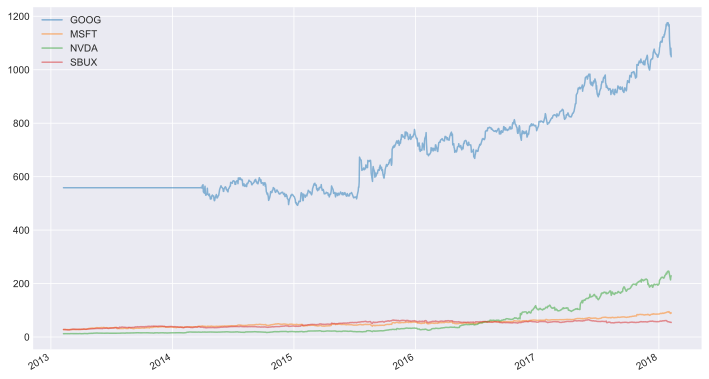

In [20]:
fig, axes = plt.subplots(figsize = (12,7))

plot_cols = ['GOOG', 'MSFT', 'NVDA', 'SBUX']

close_df[plot_cols].plot(alpha = 0.5, ax = axes)

axes.grid()


A common practice is to plot relative stock price over time where each stock is normalized with respec to its initial value. 

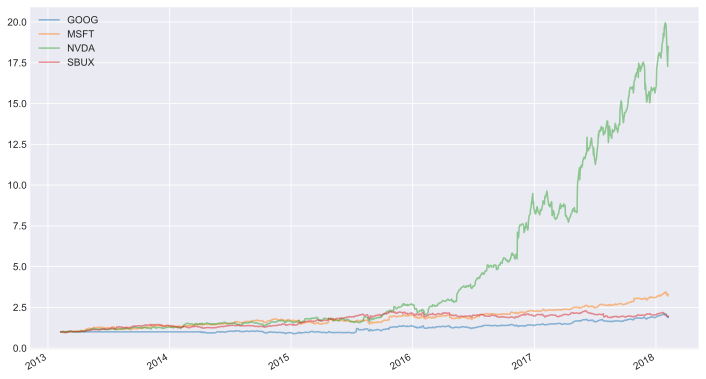

In [21]:
close_df_norm = close_df / close_df.iloc[0]

fig, axes = plt.subplots(figsize = (12,7))

plot_cols = ['GOOG', 'MSFT', 'NVDA', 'SBUX']

close_df_norm[plot_cols].plot(alpha = 0.5, ax = axes)

axes.grid()


We can see that although `GOOG` is most valuable in terms of its stock price, its growth is undermined by the `NVIDIA`, it grew approximately 20 folds between `2013` and `2018`

### Concept of Return
----

Defined over a certain time period (indicated by $n$, typically $n = 1$ indicating daily, hourly, minutely etc returns), net return is given by 

$$R_t  = \frac{P_t - P_{t-n}}{P_{t-n}},\quad \textrm{or} \quad R_t  = \frac{P_t}{P_{t-n}} - 1\,\,,$$

where $P_t$ is the price of the security at time $t$.

The simple Gross Return: How many foldings my investment grow or shrink? 

$$ 1 + R_t  = \frac{P_t}{P_{t-n}}\,\,.$$

The log return:

$$r_t = \ln(1+R_t) = \ln\left(\frac{P_t}{P_{t-n}}\right) = \ln P_t - \ln P_{t-n}$$

$$r_t  = p_t - p_{t-1}\quad,$$

where $p_t$ is the log price at time $t$. 

#### Cumulative Returns:

Given $R_1,R_2,\dots,R_{252}$ and the initial price $P_0$, we want to know $P_{252}$ ? 

$$ P_1 = P_0 (1 + R_1),\quad\quad P_2 = P_1 (1 + R_2), \quad \dots \quad P_{252} = P_0 (1 + R_1)(1 + R_2)\dots(1+R_{252})$$

- **Average Daily Return**: What constant return would I have to get every day in order to achieve the same final price $P$? 

$$ P_{252} = P_0 (1 + R)^{252}\,\,,$$

where $R$ is daily average return. Equating both sides 

$$ R = \left(\prod_{i = 1}^{252} (1 + R_i) \right)^{1/252} - 1$$

The first term on the right hand side is just the geometric mean of all returns $R_i$'s.

- **Average Daily Log Return**:

$$252(1 + R) = \sum_{i=1}^{252} \ln(1+R_i)$$

so that average daily log return is just the arithmetic mean of daily log returns:

$$ r  = \frac{1}{252} \sum_{i = 1}^{252} r_i\,\,.$$


#### Adjusted Close:
-----

Close price adjusted by taking into account stock splits and dividends. 

**Stock Splits**:

- Let's say you want to buy some shares 
- You must but whole shares (can't buy fractional shares)
- If the share price goes very high, liquidity of the stock will diminish because it becomes infeasable for anyone to buy the share. 
- Buying and selling will become difficult
- What a company can do in this scenario is a stock split: 

    Example: 2-for 1 split, for every share that currently exists, they will create two. In order for the total value to be equivalent, halve the price. 

            Say I own 100 shares of stock worth $100 per share. After 2 for 1 split, now I own 200 shares, each worth $50. The stock price simply halves. 

    In this scenario, we can't calculate the returns consistently using before-split and after-split prices, so we need to use adjusted close prices. 

Apart from stock splits, another factor that affects the adjusted close price is divident payments which is the money you get paid in cash simply for owning a share of the stock. Some companies (like `Google`) does not pay dividends with the claim that they provide more value to investors by using that money for research and development.

We will ignore dividends! But the get a general idea: `Say the stock closes at $20 at some particular day. After closeing company anounces that the company pays $1 per share in dividends. Adjusted closing pricse is $20-$1 = $19.`

Return calculations become annoying including divident payments: 

$$ 1 + R_t = \frac{P_t + D_t}{P_{t-1}},\quad\quad \textrm{or}\quad\quad R_t = \frac{P_t + D_t}{P_{t-1}} - 1\,\,,$$

where $D_t$ is the divident payment at time $t$.

For some API's (e.g Yahoo Finance) the non-adjusted close price already accounts for stock splits, which is the main source of the data we will work with. Therefore our datasets only differ in divident payments. 



In [22]:
# load the sp500sub data we downloaded from yfinance using get_data.py and append_stocks.py

df_sp = pd.read_csv('sp500sub.csv')

df_sp.head()

Date       Open       High        Low      Close  Adj Close   Volume  \
0  2013-01-02  37.919998  38.730000  37.919998  38.340000  38.340000  6483800   
1  2013-01-03  38.139999  38.299999  37.660000  37.750000  37.750000  3906000   
2  2013-01-04  37.880001  38.189999  37.619999  38.130001  38.130001  3809300   
3  2013-01-07  37.810001  38.209999  37.700001  37.939999  37.939999  3632100   
4  2013-01-08  37.779999  38.200001  37.750000  38.139999  38.139999  3080900   

   Name  
0  ADBE  
1  ADBE  
2  ADBE  
3  ADBE  
4  ADBE

In [23]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38397 entries, 0 to 38396
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       38397 non-null  object 
 1   Open       38397 non-null  float64
 2   High       38397 non-null  float64
 3   Low        38397 non-null  float64
 4   Close      38397 non-null  float64
 5   Adj Close  38397 non-null  float64
 6   Volume     38397 non-null  int64  
 7   Name       38397 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 2.3+ MB


In [24]:
df_sp['Date'] = pd.to_datetime(df_sp['Date'])

df_sp = df_sp.set_index('Date')

df_sp.index.name = None


In [25]:
df_sp.head()

Open       High        Low      Close  Adj Close   Volume  \
2013-01-02  37.919998  38.730000  37.919998  38.340000  38.340000  6483800   
2013-01-03  38.139999  38.299999  37.660000  37.750000  37.750000  3906000   
2013-01-04  37.880001  38.189999  37.619999  38.130001  38.130001  3809300   
2013-01-07  37.810001  38.209999  37.700001  37.939999  37.939999  3632100   
2013-01-08  37.779999  38.200001  37.750000  38.139999  38.139999  3080900   

            Name  
2013-01-02  ADBE  
2013-01-03  ADBE  
2013-01-04  ADBE  
2013-01-07  ADBE  
2013-01-08  ADBE

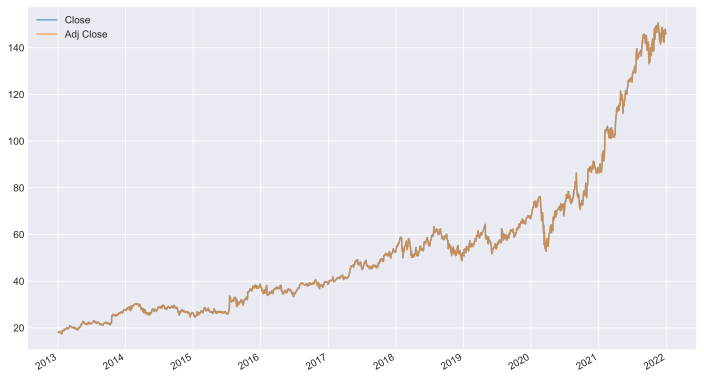

In [26]:
# focus on google 

goog_df = df_sp[df_sp['Name'] == 'GOOG']

fig, axes = plt.subplots(figsize = (12,7))

goog_df[['Close', 'Adj Close']].plot(ax = axes, alpha = 0.6)

axes.grid()

Although we know that google had its stock split in 2014, we see that close price is the same as the adjusted close which confirms that non-adjusted close price for the yahoo data already takes this into account. 

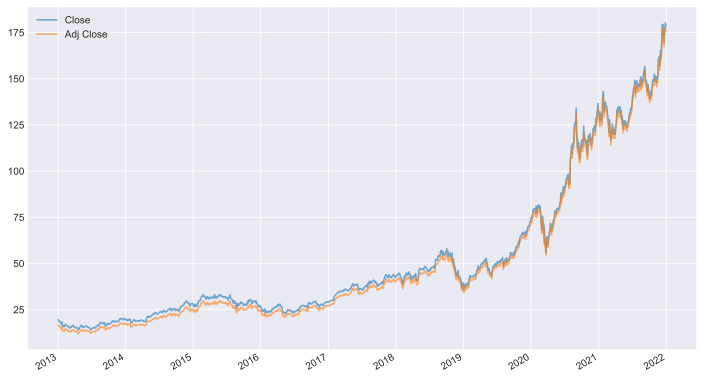

In [27]:
# focus on apple

apple_df = df_sp[df_sp['Name'] == 'AAPL']

fig, axes = plt.subplots(figsize = (12,7))

apple_df[['Close', 'Adj Close']].plot(ax = axes, alpha = 0.6)

axes.grid()

In 2014 Apple also had a seven for one stock split, again this is already taken into account in the close price of the dataset we use here. However, the adjusted close is lower than close which is much more visible for earlier dates. This confirms that the adjusted close price takes into account the dividend payments. 

------
## 2. Statistics of Financial Data 
-------

In [33]:
stocks_df = pd.read_csv('all_stocks_5yr.csv', parse_dates = True)

stocks_df.set_index('date', inplace = True)

stocks_df.index.name = None

sbux_df = stocks_df[stocks_df['Name']=='SBUX']

sbux_df.head()

open    high     low   close   volume  Name
2013-02-08  27.920  28.325  27.920  28.185  7146296  SBUX
2013-02-11  28.260  28.260  27.930  28.070  5457354  SBUX
2013-02-12  28.000  28.275  27.975  28.130  8665592  SBUX
2013-02-13  28.230  28.230  27.750  27.915  7022056  SBUX
2013-02-14  27.765  27.905  27.675  27.775  8899188  SBUX

In [34]:
# set a previous close column 

sbux_df['p_close'] = sbux_df['close'].shift(1)

sbux_df.head()

/var/folders/q0/lz7h2q596yx70_f664l6gv8h0000gn/T/ipykernel_847/3306954054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbux_df['p_close'] = sbux_df['close'].shift(1)


open    high     low   close   volume  Name  p_close
2013-02-08  27.920  28.325  27.920  28.185  7146296  SBUX      NaN
2013-02-11  28.260  28.260  27.930  28.070  5457354  SBUX   28.185
2013-02-12  28.000  28.275  27.975  28.130  8665592  SBUX   28.070
2013-02-13  28.230  28.230  27.750  27.915  7022056  SBUX   28.130
2013-02-14  27.765  27.905  27.675  27.775  8899188  SBUX   27.915

In [36]:
# returns 

sbux_df['return'] = sbux_df['close']/sbux_df['p_close'] - 1

sbux_df.head()

/var/folders/q0/lz7h2q596yx70_f664l6gv8h0000gn/T/ipykernel_847/2864483401.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbux_df['return'] = sbux_df['close']/sbux_df['p_close'] - 1


open    high     low   close     volume  Name  p_close    return
2013-02-08  27.920  28.325  27.920  28.185  7146296.0  SBUX      NaN       NaN
2013-02-11  28.260  28.260  27.930  28.070  5457354.0  SBUX   28.185 -0.004080
2013-02-12  28.000  28.275  27.975  28.130  8665592.0  SBUX   28.070  0.002138
2013-02-13  28.230  28.230  27.750  27.915  7022056.0  SBUX   28.130 -0.007643
2013-02-14  27.765  27.905  27.675  27.775  8899188.0  SBUX   27.915 -0.005015

In [37]:
# simple way of getting returns 
sbux_df['return_simp'] = sbux_df['close'].pct_change(1)

sbux_df.head()

/var/folders/q0/lz7h2q596yx70_f664l6gv8h0000gn/T/ipykernel_847/3907085089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbux_df['return_simp'] = sbux_df['close'].pct_change(1)


open    high     low   close     volume  Name  p_close  \
2013-02-08  27.920  28.325  27.920  28.185  7146296.0  SBUX      NaN   
2013-02-11  28.260  28.260  27.930  28.070  5457354.0  SBUX   28.185   
2013-02-12  28.000  28.275  27.975  28.130  8665592.0  SBUX   28.070   
2013-02-13  28.230  28.230  27.750  27.915  7022056.0  SBUX   28.130   
2013-02-14  27.765  27.905  27.675  27.775  8899188.0  SBUX   27.915   

              return  return_simp  
2013-02-08       NaN          NaN  
2013-02-11 -0.004080    -0.004080  
2013-02-12  0.002138     0.002138  
2013-02-13 -0.007643    -0.007643  
2013-02-14 -0.005015    -0.005015

<Axes: >

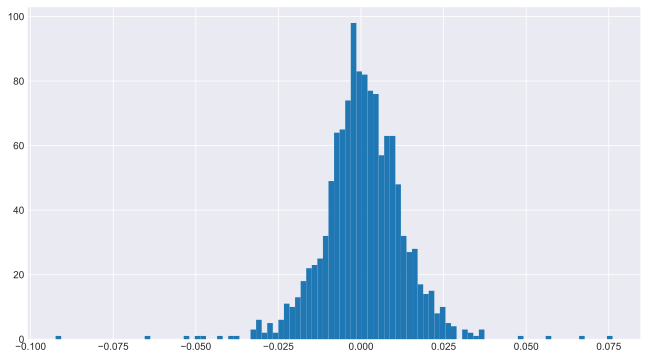

In [38]:
fig, axes = plt.subplots(figsize = (11,6))

sbux_df['return'].hist(bins = 100, ax = axes)

In [39]:
sbux_df.describe()['return']

count    1258.000000
mean        0.000600
std         0.012361
min        -0.092437
25%        -0.005841
50%         0.000577
75%         0.007815
max         0.076133
Name: return, dtype: float64

In [40]:
sbux_df['return'].mean(), sbux_df['return'].std()

(0.0006002332205830914, 0.012360934026133882)

In [41]:
# log returns notice that they are very close to actual returns 

sbux_df['log_return'] =  np.log(sbux_df['return'] + 1)

sbux_df.head()



/var/folders/q0/lz7h2q596yx70_f664l6gv8h0000gn/T/ipykernel_847/1178376685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbux_df['log_return'] =  np.log(sbux_df['return'] + 1)


open    high     low   close     volume  Name  p_close  \
2013-02-08  27.920  28.325  27.920  28.185  7146296.0  SBUX      NaN   
2013-02-11  28.260  28.260  27.930  28.070  5457354.0  SBUX   28.185   
2013-02-12  28.000  28.275  27.975  28.130  8665592.0  SBUX   28.070   
2013-02-13  28.230  28.230  27.750  27.915  7022056.0  SBUX   28.130   
2013-02-14  27.765  27.905  27.675  27.775  8899188.0  SBUX   27.915   

              return  return_simp  log_return  
2013-02-08       NaN          NaN         NaN  
2013-02-11 -0.004080    -0.004080   -0.004089  
2013-02-12  0.002138     0.002138    0.002135  
2013-02-13 -0.007643    -0.007643   -0.007672  
2013-02-14 -0.005015    -0.005015   -0.005028

Returns look like normally distributed but are they? The best way to check is a Quantile-Quantile plot, or in short QQ-plot. 

What is a Quantile? 

- Roughly speaking, we can think of it as the inverse of the CDF (cumulative distribution function)
- CDF: $F(x) = P(X \leq x)$

   Example: Say we modeled the average age of freshman students in our class. If $F(21) = 95 \%$, then 95 percent of the class is younger than 21. In this example we can think of Percentile (which is a kind of quantile) is the opposite of this: $\textrm{Percentile}(95 \%) = 21$, How old I have to be so that I am in the 95th percentile? Or How I old I have to be so that 95 percent of the class is younger than me? The answer is 21! 

- "If I am 21 years old, I am in the 95th percentile"
- Percentiles are generaliztion of quantiles with 100 bins


A QQ-plot is a plot of sample quantiles generally in the y-axis vs theoretical quantiles plot (from an assumed distribution)!


In [42]:
from scipy.stats import norm

return_range = np.linspace(sbux_df['return'].min(), sbux_df['return'].max(), 100)

normal_pdf = norm.pdf(return_range, loc = sbux_df['return'].mean(), scale = sbux_df['return'].std())

Text(0.5, 0, 'return')

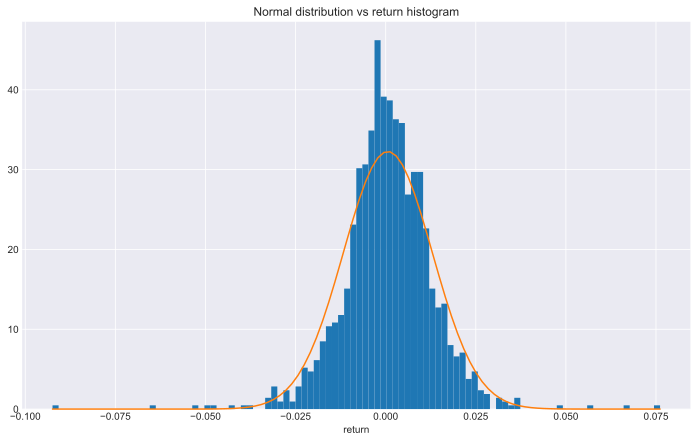

In [43]:
fig, axes = plt.subplots(figsize = (12,7))

sbux_df['return'].hist(bins = 100, ax = axes, density = True) # density = True makes the histogram normalized, by default .hist returns the raw counts which is much larger 
                                                              # values of the PDF

axes.plot(return_range, normal_pdf)

axes.set_title('Normal distribution vs return histogram')
axes.set_xlabel('return')

In [44]:
from scipy.stats import probplot 
from statsmodels.graphics.gofplots import qqplot 

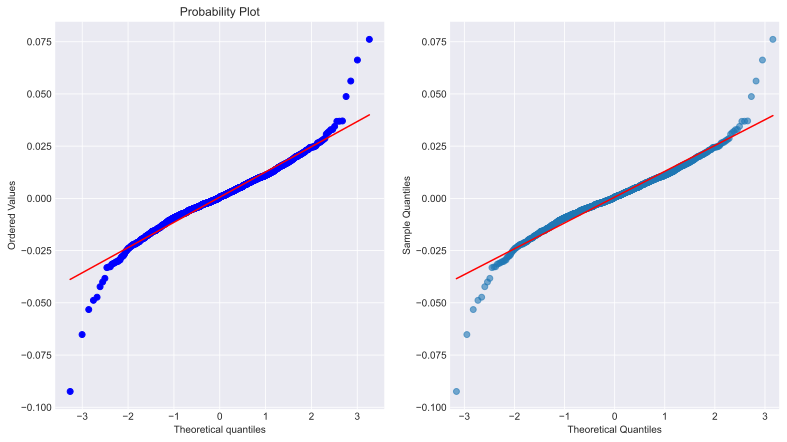

In [45]:
fig, axes = plt.subplots(1,2, figsize = (13,7))

probplot(sbux_df['return'].dropna(), dist = 'norm', fit = True, plot = axes[0]);
qqplot(sbux_df['return'].dropna(), alpha = 0.6, line='s', ax = axes[1]);

for i in range(2):
    axes[i].grid()

The same observations also apply if we were to work with log returns!

So we see that normal distribution is not a super good fit for the distribution of returns (or log returns). The most of the issue comes from the heavy tails of the returns and a good candidate that still has a bell shaped curve with heavier tails is t-distribution!

$$ P_t(x) = \frac{\Gamma({\nu+1}/{2})}{\sqrt{\pi\nu}\,\,\Gamma({\nu}/{2})}\left(1 + \frac{x^2}{\nu}\right)^{-(\nu+1)/2}$$

where $\nu$ (degrees of freedom)is a positive integer $\nu \geq 0$. So instead of exponential tails t-distribution has polynomial tails!

In [46]:
from scipy.stats import t 
import statsmodels.api as sm

<Axes: >

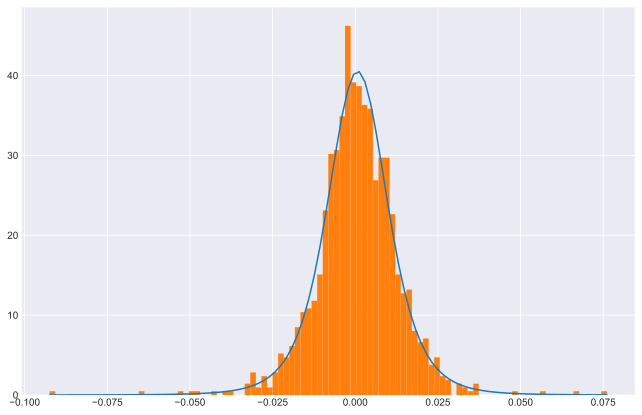

In [47]:

dof, loc, scale = t.fit(sbux_df['return'].dropna()) # degrees of freedom, mean location, and std 


tpdf_list = t.pdf(return_range, dof, loc, scale)

# plot 

fig, axes = plt.subplots(figsize = (11,7))

axes.plot(return_range, tpdf_list)

sbux_df['return'].hist(bins = 100, ax = axes, density = True)




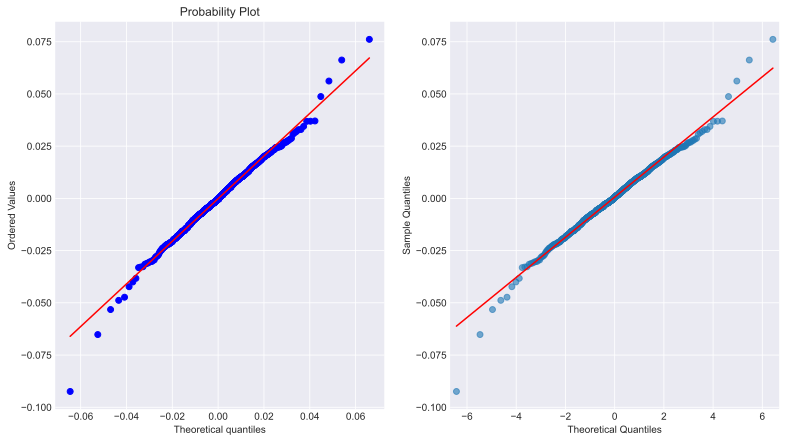

In [48]:
fig, axes = plt.subplots(1,2, figsize = (13,7))

probplot(sbux_df['return'].dropna(), dist = 't', sparams=(dof, loc, scale), plot = axes[0]);

qqplot(sbux_df['return'].dropna(), alpha = 0.6, dist=t, distargs=(dof,), line = 'r', ax = axes[1]);

for i in range(2):
    axes[i].grid()

#### More on probability distributions and statisics:
----

So far we have touched upon mean and variance of returns which are first two moments of the underlying distribution. 

We can also consider higher moments which could be very relevant: 

- skewness: 

    $$ E\left[\left(\frac{X - \mu}{\sigma}\right)^3\right] $$

and

- kurtosis: 

    $$ E\left[\left(\frac{X - \mu}{\sigma}\right)^4\right] $$


Skewneess and kurtosis are the 3rd and 4th **standardized** moments of a random variable!

- We say a distribution is left-skewed when it has a left tail, in this case skewness < 0 
- We say a distribution if right-skewed when it has a right tail, in this case skewness > 0

In the context of finance we would like to see returns with positive skewness!

Kurtosis on the other hand measures how heavy the tails are as compared to the standard Normal which has a kurtosis of 3! Because of the constancy of the kurtosis for the standard normal, it makes sense to talk about **excess** kurtosis with respect to this value! 

In [49]:
sbux_df['return'].skew(), sbux_df['return'].kurtosis()

(-0.2680784195824153, 5.593158903424731)

In [50]:
sbux_df['log_return'].skew(), sbux_df['log_return'].kurtosis()

(-0.41015501490182066, 5.964502225799283)

Starbucks daily returns are ne left skewed, with a tendency to have more extreme negative values than positives. Positive curtosis (larger than 3) implies that the returns are heavy tailed and a sharper peak than the normal distribution!

An important note: `.kurtosis()` measure the excess kurtosis with respect to Gaussian distribution. To see this explicitly see below: 

In [52]:
sample = pd.Series(np.random.randn(100000))

sample.skew(), sample.kurtosis()

(-0.00741609408584653, 0.0011778967385729366)

### Confidence Intervals
------
Number one rule of data science is, more data mean more confidence: 

- More data $\longrightarrow$ smaller confidence interval (mean estimates from the sample will be close to actual mean)
- Less data $\longrightarrow$ larger confidence interval (mean estimates from the sample will be less accurate)

Importance of confidence intervals in finance: 

- Say we estimate the expected return (which is sample mean of say daily returns) and get $>0$. Does this imply that we will make money? 

The answer depends on how confident we are about our estimate of the expected return. For example if the confidence interval of this estimate contains negative values, can we still be sure that we will definetely make money?

- Expected return, which is simply the mean return of all observations we have in a sample is a random variable. 
- It is just proportional to the sum of many random variables. Of course it is not as random as a coin toss but still random. 

$$ E[R] = \frac{1}{N} \sum_{i = 1}^{N} R_i $$

where $i$ denotes the time steps in the series and $R_i$ is the corresponding return of a single security. Recall that the sum of random variables is also random! Assuming that 

$$ R_i \sim \mathcal{N}(\mu, \sigma^2)$$

we then have 

$$ \sum_{i = 1}^{N} R_i \sim  \mathcal{N}(N \mu, N \sigma^2) $$

such that the the mean returns are distributed as 

$$E[R] = \frac{1}{N} \sum_{i = 1}^{N} R_i \sim  \mathcal{N}(\mu,  \sigma^2/ N) $$

This implies that we will be more confident about the mean returns if we have more observations!

We can `standardize` the normal distribution above by focusing on the following variable: 

$$ \frac{E[R] - \mu}{\sigma / \sqrt{N}} \sim  \mathcal{N}(0,  1)$$

Recalling that for a standar normal $\mathcal{N}(0,1)$ 95 percent confidence limits are -1.96 and 1.96: or in other words 

- Quantile(0.025) = $F^{-1}(0.025) = -1.96$
- Quantile(0.975) = $F^{-1}(0.975) = 1.96$

The $95\,\%$ confidence interval for the expected return (or mean return) is given by

$$ E[R] - 1.96 \frac{\sigma}{\sqrt{N}} \leq \mu \leq E[R] + 1.96 \frac{\sigma}{\sqrt{N}} $$

In reality we do not know the standard deviation $\sigma$ and we estimate it with sample stardard deviation $s$ and once we have done that the standardized variable we work with becomes $t$ distributed with $N-1$ degrees of freedom (approaching to standard normal as $N \to \infty$): 

$$ \frac{E[R] - \mu}{s / \sqrt{N}} \sim t_{N-1} $$

However the confidence intervals we derive assuming standard normal above is still a good estimate for large enough $N$!


`Note:` 

Recall that we started deriving these results by assuming returns $R_i$ is normally distributed which is not true strictly speaking as we have seen before. However we can again apply the CLT theorem for the sum of a large number of $t$ distributed variables to reach at a normal distribution for $E[R]$. Therefore our calculations above are justified for large enough samples $N$. 

A common way to estimate intervals in finance and time series forecasting is called `Bootstrapping`. The main idea behind this approach is to repeatedly draw samples from our own set of samples. 



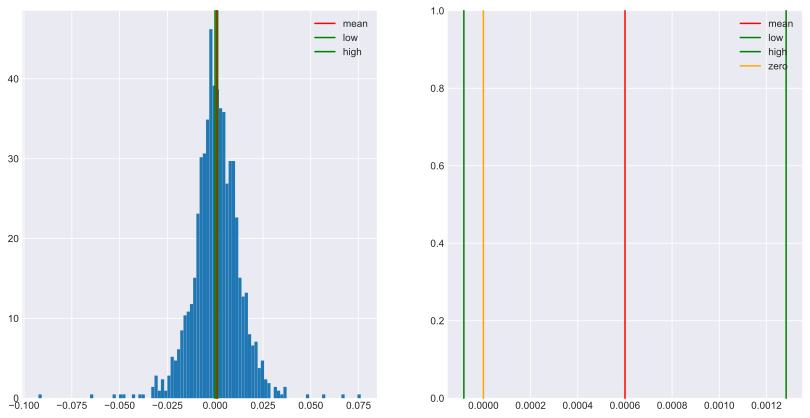

In [66]:
ret_vals = sbux_df['return'].dropna().to_numpy()

mu = ret_vals.mean()
s = ret_vals.std(ddof = 1)

mu_l = mu - 1.96 * s / np.sqrt(len(ret_vals))
mu_h = mu + 1.96 * s / np.sqrt(len(ret_vals))

fig, axes = plt.subplots(1,2, figsize = (14,7))

sbux_df['return'].hist(bins = 100, density = True, ax = axes[0])

axes[0].axvline(mu, label = 'mean', c = 'red')
axes[0].axvline(mu_l, label = 'low', c = 'green')
axes[0].axvline(mu_h, label = 'high', c = 'green')


axes[1].axvline(mu, label = 'mean', c = 'red')
axes[1].axvline(mu_l, label = 'low', c = 'green')
axes[1].axvline(mu_h, label = 'high', c = 'green')
axes[1].axvline(0, label = 'zero', c = 'orange')

axes[0].legend()
axes[1].legend()
axes[1].grid()





Notice that confidence interval still includes zero and negative value. 

### Statistical Testing
-----

One-Sample test: 

- Compare a single group of measurements to a single number 
- E.g: Are standardized test scores at my school different from national average $\mu_0$? 

$$H_0 : \mu = \mu_0$$
$$ H_a : \mu \neq \mu_0$$

where the sample mean of test scores is distributed as $\bar{X} \sim \mathcal{N}(\mu, \sigma^2)$. From the perspective of one-sample test we reject the null hypothesis if $\mu_0$ falls outside the $95 \%$ confidence interval. The rejection region is simply on the extreme ends of the $\bar{X}$ distribution. This is how statistical testing and the concept of confidence interval are related. 

The rejection region is defined by the boundaries of the confidence interval. From this perspective we are trying to determine how many standard deviations the distance between $\bar{X}$ and $\mu_0$, which is usually framed as a `Z test`: 

$$ Z = \frac{\bar{X}-\mu_0}{\sigma / \sqrt{N}}$$

From this perspective we reject the null hypothesis if:

$$\bar{X}-\mu_0 > 1.96 \sigma / \sqrt{N},\quad \textrm{or}\quad \bar{X}-\mu_0  < - 1.96 \sigma / \sqrt{N}$$ 


What is a p-value? 

- It is the probability of seeing a test statistic (Z) as extreme of more extreme assuming $H_0$ (null hypothesis) is true. 


`Note`: Again our exploration here is for intuition purposes only! Since we do not know the true standard deviation, we estimate it using sample standard deviation in which case test statistic is t-distributed and now it is called `t-test`. We will look at all kinds of tests, e.g `Jarque-Bera Test` for normality where $H_0:$ data is normal distributed. Another test is `Kolmogrow-Smirnow test` which can be used for any distribution. 

In [75]:
from scipy.stats import jarque_bera, normaltest 

print(f"Normality test statistic using Jarque-bera: {jarque_bera(ret_vals).statistic:.4f} and p-val: {jarque_bera(ret_vals).pvalue:.4f}")
print(f"Normality test statistic using Jarque-bera: {normaltest(ret_vals).statistic:.4f} and p-val: {normaltest(ret_vals).pvalue:.4f}")

Normality test statistic using Jarque-bera: 1639.0284 and p-val: 0.0000
Normality test statistic using Jarque-bera: 172.6820 and p-val: 0.0000


In [77]:
# kolmogrow-Smirnow test 

from scipy.stats import t, kstest

dof, loc, scale = t.fit(ret_vals)


KS_res = kstest(ret_vals, lambda x: t.cdf(x,dof,loc,scale))

print(f"t-test statistic using Kolmogrow-Smirnow: {KS_res.statistic:.4f} and p-val: {KS_res.pvalue:.4f}")

t-test statistic using Kolmogrow-Smirnow: 0.0189 and p-val: 0.7538


We can not reject the null hypothesis $H_0$: returns are t-distributed

In [78]:
from scipy.stats import ttest_1samp

# one sample test to check if the returns have a mean other than zero, note that these are 2 sided tests in the sense that it checks both sides of 0  

print(f"One sample t-test: {ttest_1samp(ret_vals, 0).statistic:.4f} and p-val: {ttest_1samp(ret_vals, 0).pvalue:.4f}")


One sample t-test: 1.7223 and p-val: 0.0853


At 95 percent confidence level we can not reject the null hypotesis that returns come from a distribution with mean zero!

### Covariance and Correlation
------

Recall variance: 

$$ var(R_i) = E[(R_i - \mu_i)^2] = \sigma_i^2$$ 

where $\mu_i = E[R_i]$. 

- Covariance (Matrix): 

$$ cov(R_i, R_j) = E[(R_i - \mu_i)(R_j-\mu_j)]  = \sigma_{ij} \equiv {\bf \Sigma}$$

where the sub-scripts $i,j$ now represent different stocks. Notice that when $i = j$ covariance is just variance: 

$$ cov(R_i, R_i) = var(R_i) = \sigma_i^2 $$

${\bf \Sigma}$ is a symmetric matrix. 

If I have $N \times D$ matrix of stock returns, the sample covariance matrix is given by

$$ \hat{\Sigma}_{ij} = \frac{1}{N-1} \sum_{n=1}^{N}(R_{ni} - \bar{R}_i)(R_{nj} - \bar{R}_j)$$

where $\bar{R}_i$ is the D dimensional vector of mean returns. 

- Correlation 

$$ corr(i,j) \equiv \rho_{ij} =  \frac{cov(i,j)}{\sigma_i \sigma_j}$$

In [88]:
tickers = ['AAPL', 'GOOG', 'AMD', 'IBM', 'SBUX']

sub_close_df = close_df[tickers].copy()

sub_close_df.head()

AAPL    GOOG   AMD     IBM    SBUX
2013-02-08  67.8542  558.46  2.59  201.68  28.185
2013-02-11  68.5614  558.46  2.67  200.16  28.070
2013-02-12  66.8428  558.46  2.77  200.04  28.130
2013-02-13  66.7156  558.46  2.75  200.09  27.915
2013-02-14  66.6556  558.46  2.75  199.65  27.775

In [89]:
for ticker in tickers:
    
    sub_close_df[ticker + '_ret'] = sub_close_df[ticker].pct_change(1)

In [90]:
sub_close_df.head()

AAPL    GOOG   AMD     IBM    SBUX  AAPL_ret  GOOG_ret  \
2013-02-08  67.8542  558.46  2.59  201.68  28.185       NaN       NaN   
2013-02-11  68.5614  558.46  2.67  200.16  28.070  0.010422       0.0   
2013-02-12  66.8428  558.46  2.77  200.04  28.130 -0.025067       0.0   
2013-02-13  66.7156  558.46  2.75  200.09  27.915 -0.001903       0.0   
2013-02-14  66.6556  558.46  2.75  199.65  27.775 -0.000899       0.0   

             AMD_ret   IBM_ret  SBUX_ret  
2013-02-08       NaN       NaN       NaN  
2013-02-11  0.030888 -0.007537 -0.004080  
2013-02-12  0.037453 -0.000600  0.002138  
2013-02-13 -0.007220  0.000250 -0.007643  
2013-02-14  0.000000 -0.002199 -0.005015

In [91]:
sub_returns_df = sub_close_df[[ticker + "_ret" for ticker in tickers]].copy()

sub_returns_df = sub_returns_df.dropna()

sub_returns_df.head()

AAPL_ret  GOOG_ret   AMD_ret   IBM_ret  SBUX_ret
2013-02-11  0.010422       0.0  0.030888 -0.007537 -0.004080
2013-02-12 -0.025067       0.0  0.037453 -0.000600  0.002138
2013-02-13 -0.001903       0.0 -0.007220  0.000250 -0.007643
2013-02-14 -0.000899       0.0  0.000000 -0.002199 -0.005015
2013-02-15 -0.013780       0.0 -0.014545  0.006662 -0.021782

In [92]:
import seaborn as sns 

sns.pairplot(sub_returns_df)

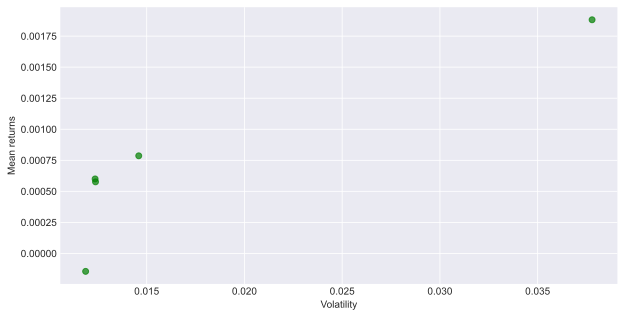

In [95]:
mean_ret = sub_returns_df.mean()

vol_ret = sub_returns_df.std()

fig, axes = plt.subplots(figsize = (10,5))

axes.scatter(vol_ret,mean_ret, c = 'green', alpha = 0.7)

axes.set_xlabel('Volatility') # volatility is typically considered the std of the 'annualized' returns byt we will ignore that detail for now 
axes.set_ylabel('Mean returns')

axes.grid()

In [96]:
sub_returns_df.corr()

AAPL_ret  GOOG_ret   AMD_ret   IBM_ret  SBUX_ret
AAPL_ret  1.000000  0.359016  0.187279  0.263927  0.307716
GOOG_ret  0.359016  1.000000  0.107589  0.305570  0.396906
AMD_ret   0.187279  0.107589  1.000000  0.203874  0.126867
IBM_ret   0.263927  0.305570  0.203874  1.000000  0.315263
SBUX_ret  0.307716  0.396906  0.126867  0.315263  1.000000

In [97]:
sub_returns_df.cov()

AAPL_ret  GOOG_ret   AMD_ret   IBM_ret  SBUX_ret
AAPL_ret  0.000213  0.000065  0.000103  0.000046  0.000056
GOOG_ret  0.000065  0.000153  0.000050  0.000045  0.000061
AMD_ret   0.000103  0.000050  0.001428  0.000091  0.000059
IBM_ret   0.000046  0.000045  0.000091  0.000141  0.000046
SBUX_ret  0.000056  0.000061  0.000059  0.000046  0.000153

----
## 3. Alpha and Beta
-----

The concept of alpha and beta in finance is essentially related with the concept of correlation. Recall that in a scatter plot if two stocks are correlated, the data will tend to cluster around a linear line. 

In the context of finance, we are usually interested in the correlation of a security (stock/index/mutual fund/ etc.) with respect to the 'market' which we can refer to as S&P500 represented by the ticker `SPY`: 

Say we compare the correlation of apple returns with market: 

$$ r_{A} = \beta\, r_M + \alpha $$

So simply $\beta$ tells us how much apple increases/decreases relative to the market (as $r_M$ could be negative). On the other hand, $\alpha$ measures how much apple is better irrespective of the market (returns) $r_M = 0$. A positive alpha means that the stock we are looking at has outperformed the market, while a negative one implies it is underperforming with respect to the market. 


In [98]:
df = pd.read_csv('sp500sub.csv', parse_dates=True)

In [101]:
spy_df = df[df.Name == 'SPY']

spy_df.set_index('Date', inplace = True)

spy_df.index.name = None 

spy_df.head()

Open        High         Low       Close   Adj Close  \
2013-01-02  145.110001  146.149994  144.729996  146.059998  118.738853   
2013-01-03  145.990005  146.369995  145.339996  145.729996  118.470551   
2013-01-04  145.970001  146.610001  145.669998  146.369995  118.990837   
2013-01-07  145.850006  146.110001  145.429993  145.970001  118.665665   
2013-01-08  145.710007  145.910004  144.979996  145.550003  118.324242   

               Volume Name  
2013-01-02  192059000  SPY  
2013-01-03  144761800  SPY  
2013-01-04  116817700  SPY  
2013-01-07  110002500  SPY  
2013-01-08  121265100  SPY

In [102]:
# SPY returns 

spy_df['SPY'] = spy_df['Close'].pct_change(1)

/var/folders/q0/lz7h2q596yx70_f664l6gv8h0000gn/T/ipykernel_847/792592302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy_df['SPY'] = spy_df['Close'].pct_change(1)


In [103]:
# Focus on NVIDIA to compare with SP500 - SPY

nvda_df = df[df.Name == 'NVDA']

nvda_df.set_index('Date', inplace = True)

nvda_df.index.name = None 

nvda_df.head()

Open     High      Low    Close  Adj Close     Volume  Name
2013-01-02  0.31400  0.31825  0.31275  0.31800   0.293560  478836000  NVDA
2013-01-03  0.31800  0.32175  0.31450  0.31825   0.293791  298888000  NVDA
2013-01-04  0.31875  0.32975  0.31775  0.32875   0.303484  524968000  NVDA
2013-01-07  0.32850  0.32950  0.31700  0.31925   0.294714  610732000  NVDA
2013-01-08  0.32000  0.32100  0.31000  0.31225   0.288252  466424000  NVDA

In [104]:
# NVIDIA returns 

nvda_df['NVDA'] = nvda_df['Close'].pct_change(1)

/var/folders/q0/lz7h2q596yx70_f664l6gv8h0000gn/T/ipykernel_847/598064930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvda_df['NVDA'] = nvda_df['Close'].pct_change(1)


In [107]:
joined_rets_df = nvda_df[['NVDA']].join(spy_df['SPY'])

joined_rets_df = joined_rets_df.dropna()

joined_rets_df.head()

NVDA       SPY
2013-01-03  0.000786 -0.002259
2013-01-04  0.032993  0.004392
2013-01-07 -0.028897 -0.002733
2013-01-08 -0.021926 -0.002877
2013-01-09 -0.022418  0.002542

Index(['2013-01-03', '2013-01-04', '2013-01-07', '2013-01-08', '2013-01-09',
       '2013-01-10', '2013-01-11', '2013-01-14', '2013-01-15', '2013-01-16',
       ...
       '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
       '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30'],
      dtype='object', length=2265)

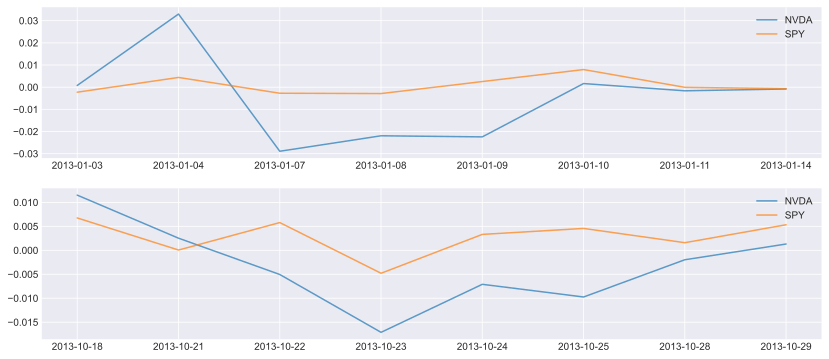

In [113]:
# returns for two different time slices 

fig, axes = plt.subplots(2,1, figsize = (14,6))

s1 = joined_rets_df.index[0]
e1 = joined_rets_df.index[7]
s2 = joined_rets_df.index[200]
e2 = joined_rets_df.index[207]

joined_rets_df.loc[s1:e1].plot(ax= axes[0], alpha = 0.7)
joined_rets_df.loc[s2:e2].plot(ax= axes[1], alpha = 0.7)

axes[0].grid()
axes[1].grid()


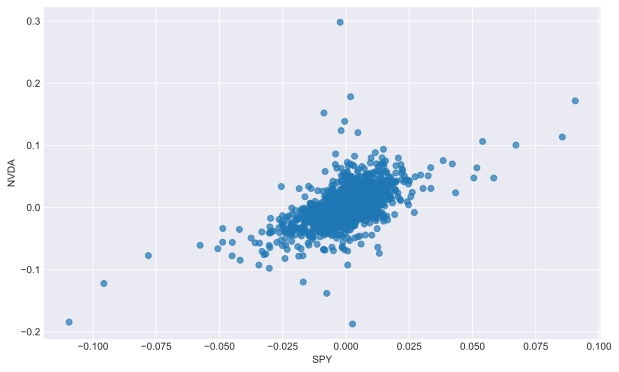

In [119]:

fig, axes = plt.subplots(figsize = (10,6))

axes.scatter(joined_rets_df['SPY'], joined_rets_df['NVDA'], alpha = 0.7)

axes.set_xlabel('SPY')
axes.set_ylabel('NVDA')
axes.grid()


We do seem to have some correlation.

In [120]:
joined_rets_df.corr()

NVDA       SPY
NVDA  1.000000  0.588544
SPY   0.588544  1.000000

In [123]:
# Create a dataset for linear regression 

X = joined_rets_df[['SPY']].to_numpy()
y = joined_rets_df[['NVDA']].to_numpy()

X.shape, y.shape

((2265, 1), (2265, 1))

In [125]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X,y);


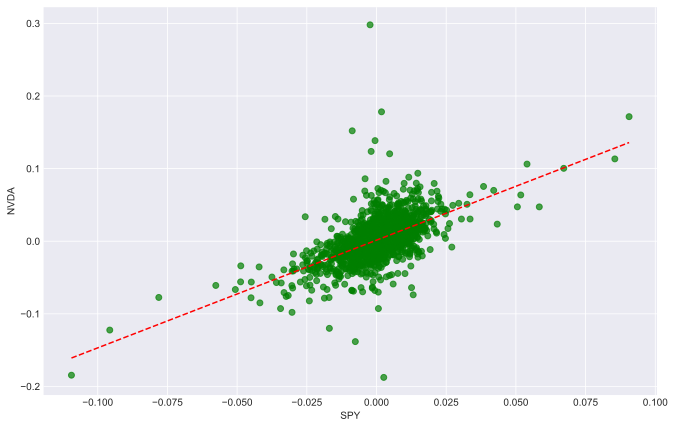

In [127]:
# Predict the best fit line 

X_pred_int = np.linspace(X.min(), X.max(), 10).reshape(-1,1)
y_pred = model.predict(X_pred_int)

fig, axes = plt.subplots(figsize = (11,7))

axes.scatter(X,y, c='green', alpha = 0.7)
axes.plot(X_pred_int,y_pred, c = 'red', ls = '--')

axes.set_xlabel('SPY')
axes.set_ylabel('NVDA')

axes.grid()



In [144]:
# get alpha and beta 

alpha, beta = model.intercept_, model.coef_

print(f'Best fit alpha and beta are: {alpha[0]:.5f} and {beta[0][0]:.5f}')

Best fit alpha and beta are: 0.00149 and 1.48365


Based on the positive alpha, we might be tempted to invest on NVIDIA however this comes with a price because calculation of alpha does not take into account the risk associated with it. 

In [145]:
# ratio of risk(volatility) of NVIDIA vs SPY

joined_rets_df['NVDA'].std()/joined_rets_df['SPY'].std()

2.520881807411727

The returns are higher than the market for NVIDIA however in general it appears to be much more volatile as compared to the market!

### Mixture of Gaussians
-----

Earlier we saw that the returns are heavy-tailed, simple Normal (Gaussian) distribution is not a good fit to returns and the t-distribution seemed a better fit. 
But now for the purpose density estimation we will assume that they are Gaussian.

**Gaussian Mixture Model (GMM) or Mixture of Gaussians**: Is a method that enables modelling multi-modal distributions. It works similar to clustering method, identifying different clusters that a given observation belongs to. Each cluster is considered as a Gaussian dist. 


$$ p(x) = \pi_1\,\mathcal{N}(\mu_1, \Sigma_1) + \pi_2\, \mathcal{N}(\mu_2, \Sigma_2) + \dots + \pi_K\, \mathcal{N}(\mu_K, \Sigma_K)$$

where

$$\sum_{k = 1}^{K} \pi_k = 1$$

because 

$$ \int p(x) dx  = 1,\quad\quad \int \mathcal{N} dx  = 1$$

**Learning**:
- How do we find $\pi$? 
- And of course $\mu,\Sigma$? 

One might wonder how Gaussian Mixture can be useful for stock returns which as we have seen are not multi-modal! The reason we are using GMM is the nice property that the tails are heavier than a single Gaussian:  

Given a Gaussian distribution $\mathcal{N}(\mu, \sigma^2)$

Consider the Gaussian mixture distribtion: 

$$  \pi \in (0,1), p(x) = \pi\,\mathcal{N}(\mu, \sigma_1^2)  + (1-\pi)\, \mathcal{N}(\mu, \sigma_2^2)  $$

One can choose ($\pi$) $\sigma_1^2$ and $\sigma_2^2$ such that the mixture has same mean and variance as the original, but heavier tails!

$$ var(X) = \sigma^2$$

In other words, the kurtosis of the Gaussian mixture model can be larger than the single Gaussian!

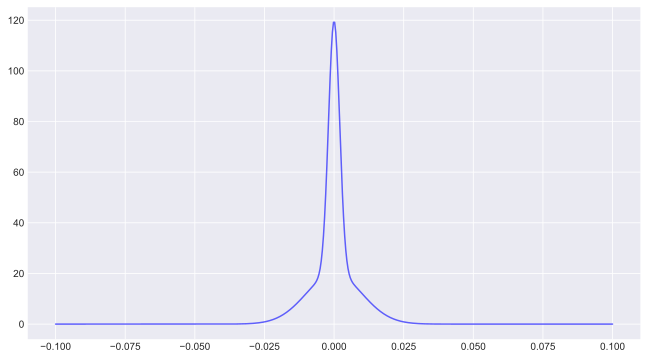

In [146]:
# generate some return list

ret_list = np.linspace(-0.1,0.1,500)

pi = 0.5 

# A gaussian mixture model 
fx = pi * norm.pdf(ret_list, loc = 0, scale = 0.01) + (1-pi) * norm.pdf(ret_list, loc  = 0, scale = 0.002)

fig, axes = plt.subplots(figsize = (11,6))

axes.plot(ret_list, fx, c = 'blue', alpha = 0.6)

axes.grid()

In [147]:
# generate sample from our model 

samples = []

mu1, std1 = 0, 0.01
mu2, std2 = 0, 0.002

for _ in range(5000):
    
    if np.random.random() < pi: 
        
        # choose Gaussian 1
        x = norm.rvs(mu1,std1)
    else:
        
        # choose Gaussian 2
        x = norm.rvs(mu2,std2)
        
    samples.append(x)
    
series = pd.Series(samples)

series.kurtosis()


2.502101749235443

In [158]:
from sklearn.mixture import GaussianMixture

data = sbux_df['return'].dropna().to_numpy().reshape(-1,1)

model = GaussianMixture(n_components = 2)

model.fit(data);


weights = model.weights_
means = model.means_
cov = model.covariances_

print(f"Weights, means and variances of the mixture model of starbucks returns:\n weigths: {weights}\n means: {means}\n variances: {cov}")

Weights, means and variances of the mixture model of starbucks returns:
 weigths: [0.61008469 0.38991531]
 means: [[ 0.00106789]
 [-0.00013149]]
 variances: [[[6.49399907e-05]]

 [[2.91627808e-04]]]


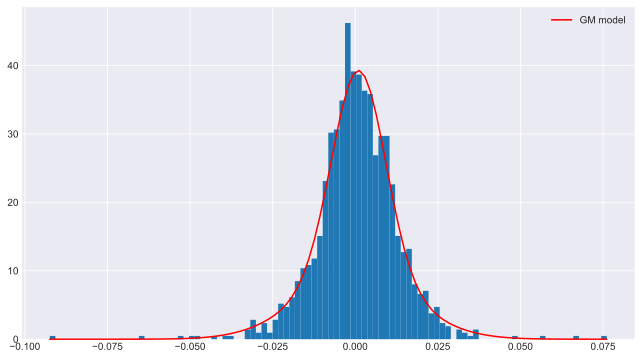

In [161]:
means = means.flatten()
var = cov.flatten()
sbux_ret_list = np.linspace(data.min(), data.max(), 100)

fx1 = norm.pdf(sbux_ret_list, means[0], np.sqrt(var[0]))
fx2 = norm.pdf(sbux_ret_list, means[1], np.sqrt(var[1]))

fx = weights[0] * fx1 + weights[1] * fx2

fig, axes = plt.subplots(figsize = (11,6))

sbux_df['return'].hist(bins = 100, density = True, ax = axes)
axes.plot(sbux_ret_list, fx, c = 'red', label = 'GM model')

axes.legend()

GM model does indeed capture the distribution of the returns better than a single Gaussian!

### Volatility Clustering
-----

Previously we looked at how stuck returns can be modeled by multiple Gaussians. Now we will also start exploring the time component of stock returns as well. 

Typically when we model a random variable as a Gaussian, we think of each sample as being independent and identically distributed. However these characteristic can change in time, in particular the independence of samples. 

This occurs for example in general for stock returns where high/low volatility follow high/low volatility. 

### Simulating Stock Prices
------

Rather than trying to predict stock prices, price simulations is much more useful:

- Help you understand how your algorithm (say trading strategy) will behave under uncertainty 
- Helps you asses how your algorithm works under different circumstances. 

In [166]:
sbux_df['return'].dropna()

2013-02-11   -0.004080
2013-02-12    0.002138
2013-02-13   -0.007643
2013-02-14   -0.005015
2013-02-15   -0.021782
                ...   
2018-02-01   -0.014258
2018-02-02   -0.004107
2018-02-05   -0.019365
2018-02-06    0.016822
2018-02-07   -0.020680
Name: return, Length: 1258, dtype: float64

open    high     low   close      volume  Name  p_close  \
2013-02-11  28.260  28.260  27.930  28.070   5457354.0  SBUX   28.185   
2013-02-12  28.000  28.275  27.975  28.130   8665592.0  SBUX   28.070   
2013-02-13  28.230  28.230  27.750  27.915   7022056.0  SBUX   28.130   
2013-02-14  27.765  27.905  27.675  27.775   8899188.0  SBUX   27.915   
2013-02-15  27.805  27.850  27.085  27.170  18195730.0  SBUX   27.775   
...            ...     ...     ...     ...         ...   ...      ...   
2018-02-01  56.280  56.420  55.890  56.000  14690146.0  SBUX   56.810   
2018-02-02  55.900  56.320  55.700  55.770  15358909.0  SBUX   56.000   
2018-02-05  55.530  56.260  54.570  54.690  16059955.0  SBUX   55.770   
2018-02-06  53.685  56.060  53.560  55.610  17415065.0  SBUX   54.690   
2018-02-07  55.080  55.430  54.440  54.460  13927022.0  SBUX   55.610   

              return  return_simp  log_return  
2013-02-11 -0.004080    -0.004080   -0.004089  
2013-02-12  0.002138     0.002138    0.002135  
2013-02-13 -0.007643    -0.007643   -0.007672  
2013-02-14 -0.005015    -0.005015   -0.005028  
2013-02-15 -0.021782    -0.021782   -0.022023  
...              ...          ...         ...  
2018-02-01 -0.014258    -0.014258   -0.014361  
2018-02-02 -0.004107    -0.004107   -0.004116  
2018-02-05 -0.019365    -0.019365   -0.019555  
2018-02-06  0.016822     0.016822    0.016682  
2018-02-07 -0.020680    -0.020680   -0.020897  

[1258 rows x 10 columns]

To generate price simulation, take all historical returns and sample form them to generate a new series

In [170]:
# 1st way: sampling from the existing returns 
sbux = sbux_df.dropna()
p0 = sbux.iloc[-1]['close'] # last close price as the initial price for the simulation 

prices = [p0]

returns = sbux['return']

for _ in range(100):
    
    r = np.random.choice(returns)
    
    p = prices[-1] * (1 + r)
    
    prices.append(p)

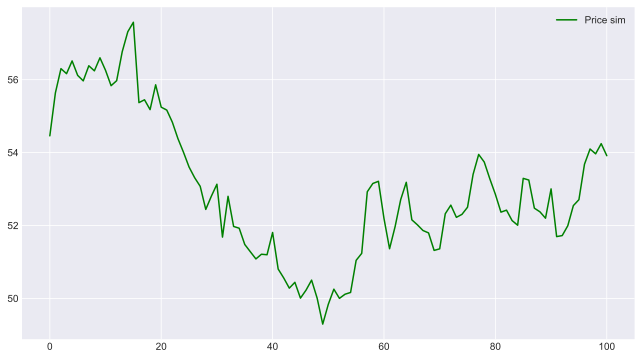

In [172]:
fig, axes = plt.subplots(figsize = (11,6))

axes.plot(prices, c = 'green', label = 'Price sim')

axes.grid()
axes.legend()

In [173]:
# 2nd way, sampling from a fitted t-distribution 

df,loc, scale = t.fit(sbux['return'])

p0 = sbux.iloc[-1]['close'] # last close price as the initial price for the simulation 

prices = [p0]

for _ in range(100):
    
    r = t.rvs(df,loc, scale)
    
    p = prices[-1] * (1 + r)
    
    prices.append(p)

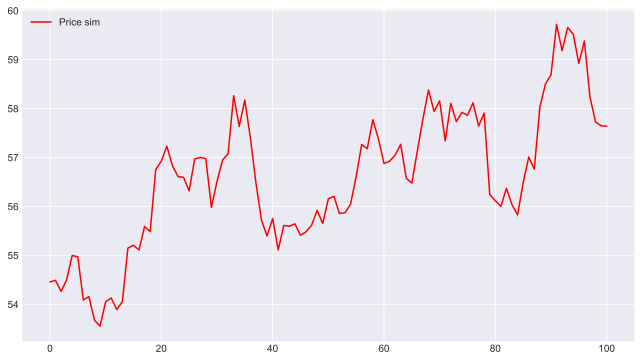

In [174]:
fig, axes = plt.subplots(figsize = (11,6))

axes.plot(prices, c = 'red', label = 'Price sim')

axes.grid()
axes.legend()